<center>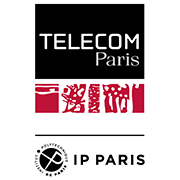</center>

<h1><center><strong><font color='crimson'>
  IA 717: Poetry Generation Project
</font></strong></center></h1>

<center>
  <h3> Project Supervisor <br/> Cyril Chhun</h3>
  <email>cyril.chhun@telecom-paris.fr</email>
  <br/>
  Year 2021-2022
</center>

<h3><center><font color='cornflowerblue'><strong>
    Student Version  
</strong></font></center></h3>

<student><center>

  Ramzi Khalifa
  <br/>Louis-Gabriel Pouillot
  <br/>Yann Rodriguez
</student></center>

---
# __<font color="crimson">THEORY PART : Poetry generation</font>__

In this project, we will tackle automatic French poetry generation.

Since this task is pretty ambitious, we will need rather complex language models. We will be using recurrent neural networks (RNN), and particularly Long-Short Term Memory (LSTM) cells.

### Task Definition

Let us begin with defining our task more precisely.

In this project, we will focus on verse, specifically [alexandrines](https://www.wikiwand.com/fr/Alexandrin), c'est-à-dire des vers de douze syllabes.

For example, this famous line from Racine's *Phèdre* is one of them:
> Tout m'afflige et me nuit, et conspire à me nuire.

We will also want these verses to rhyme in pairs, in what we call "flat" rhymes, i.e., of the form AABB(CC...).

> Tout m'afflige et me nuit, et conspire à me nuire.  
> Comme on voit tous ses vœux l’un l’autre se détruire !  
> Vous-même, condamnant vos injustes desseins,  
> Tantôt à vous parer vous excitiez nos mains ;

If you have time and motivation left, you will find at the end of this notebook some additional work tracks.

Of course, you are also free to look for others on your own, should you feel like it!

### On neural networks

#### Basic facts

An in-depth study of neural networks is not the object of this project, but it can be useful to have a rough idea of how they work. We will present them here briefly; the curious reader can consult the sources cited below, refer to the Deep Learning course of the curriculum or search by themslves, on the Internet for example.

The perceptron, also called artificial neuron or formal neuron, tries to reproduce the function of a biological neuron. The objective of a neural network is to reproduce an arbitrarily complex function that associates an input $x$ with an output $y$. For example, we can create neural networks to recognize a dog from a cat: the input is then an image, and the output the word "dog" or "cat".

A layer of a neural network is governed by the following equation:

$$ \hat{y} = f(\mathbf{W} \mathbf{X} + b) $$

where
- $\mathbf{X}$ is the input matrix, usually consisting of several vectors $x_1, \dots, x_m$
- $\hat{y}$ is the output vector
- $\mathbf{W}$ is a matrix of weights (parameters specific to the layer, which can be updated)
- $b$ is a vector of weights called *bias* (also subject to evolution)
- $f$ is a function called *activation function*, generally non-linear like the sigmoid, $\mathrm{ReLU}$ or $\tanh$ functions.

![](https://user.oc-static.com/upload/2018/12/10/15444553183515_neuroneformel-1.png)

The main thing to remember is that the layers of a neural network combine inputs $x_1, \dots, x_m$ by linear (the $\mathbf{W} \mathbf{X} + b$) and non-linear ($f$) operations in the hope of obtaining an output $y$.

In practice, at the initialization of the network, given an input $x$, we usually obtain an output $\hat{y}$ which can be very different from $y$ : the parameters $\mathbf{W}$ and $b$ are not yet appropriate.

We then perform a *training* of the neural network which allows to reduce the distance between $\hat{y}$ and $y$, i.e. to minimize the *loss function* $\mathcal{L}(y, \hat{y}) = \| \hat{y} - y \|^2$. This is usually done by an optimization process such as gradient descent. We will skip the technical details (look at the sources for more information); just remember that by updating the parameters $\mathbf{W}$ and $b$ incrementally, it is possible to improve the performance of the network as it will produce a $\hat{y}$ similar to the desired $y$.

![](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_04-GradientDescent-WHITEBG.png)

By stacking such layers, the network becomes more complex, hence, more elaborate mechanisms can be approximated. However, this usually requires a longer and more data-intensive training. The "*Deep*" in *Deep Learning* reflects the fact that we use multi-layered neural networks.

As an illustration, here is a neural network that learns to separate crosses and circles: the more the training progresses (a step is commonly called *epoch*), the better it works.

![](https://user.oc-static.com/upload/2018/12/12/15446484526497_linearsep_anim.gif)

##### Sources

- [OpenClassrooms - Initiez-vous au Deep Learning](https://openclassrooms.com/fr/courses/5801891-initiez-vous-au-deep-learning)
- [IBM - What are neural networks?](https://www.ibm.com/cloud/learn/neural-networks)

#### Recurrent neural networks

Recurrent neural networks (RNN) are neural networks that are particularly adapted to process sequential data such as time series or text. Indeed, in a text, there are sequential dependencies between words; we cannot write a sentence in any order, in French or English at least.

The difference between RNNs and classical neural networks (usually called *feed-forward neural networks*) is that the former have a "memory" represented by a hidden state that evolves along a "time" axis in any given layer.

![](https://miro.medium.com/max/875/1*AQ52bwW55GsJt6HTxPDuMA.gif)
![](https://miro.medium.com/max/875/1*o-Cq5U8-tfa1_ve2Pf3nfg.gif)
![](https://miro.medium.com/max/875/1*WMnFSJHzOloFlJHU6fVN-g.gif)

There are many ways to implement such a memory; here we will use a type of RNN called LSTM (Long-Short Term Memory), which was the best performing model until the introduction of the *transformer* in 2017 (which *transformer* will not be on the agenda of this project; the curious reader may read the corresponding paper in the sources).

![](https://miro.medium.com/max/875/1*0f8r3Vd-i4ueYND1CUrhMA.png)

The LSTM exhibits several interesting mechanisms; in particular, it has the ability to choose what it wishes to retain or forget in the long term. Refer to the sources for more detail.


##### Sources

- [colah's blog - Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Towards data science - Illustrated Guide to LSTM’s and GRU’s: A step by step explanation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)
- [Distill - Attention and Augmented Recurrent Neural Networks](https://distill.pub/2016/augmented-rnns/)
- [Transformer - Attention Is All You Need](https://arxiv.org/abs/1706.03762)